In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import tensorflow as tf
import keras
import sys
import os
import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score, classification_report
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Dropout, BatchNormalization, Flatten
from keras import Input
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from keras import layers

In [3]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [4]:
print('X_train shape::: ',X_train.shape)
print('X_test shape::: ',X_test.shape)
print('y_train shape::: ',y_train.shape)
print('y_test shape::: ',y_test.shape)

X_train shape:::  (60000, 28, 28)
X_test shape:::  (10000, 28, 28)
y_train shape:::  (60000,)
y_test shape:::  (10000,)


In [5]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [6]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [7]:
y_test2 = y_test

In [8]:
def disp_img(X,y):
    labels = ['zero', 'one', 'two', 'three', 'four', 
          'five', 'six', 'seven', 'eight', 'nine']
    fig,ax = plt.subplots(5,5,sharey=False, tight_layout=True, figsize=(17,17), facecolor='white')
    n=0
    for i in range(0,5):
        for j in range(0,5):
            ax[i,j].matshow(X[n+100])
            index = int(y[n+100])
            ax[i,j].set_title(labels[index],fontsize=8)
            n=n+1
            plt.axis('off')
    plt.show()

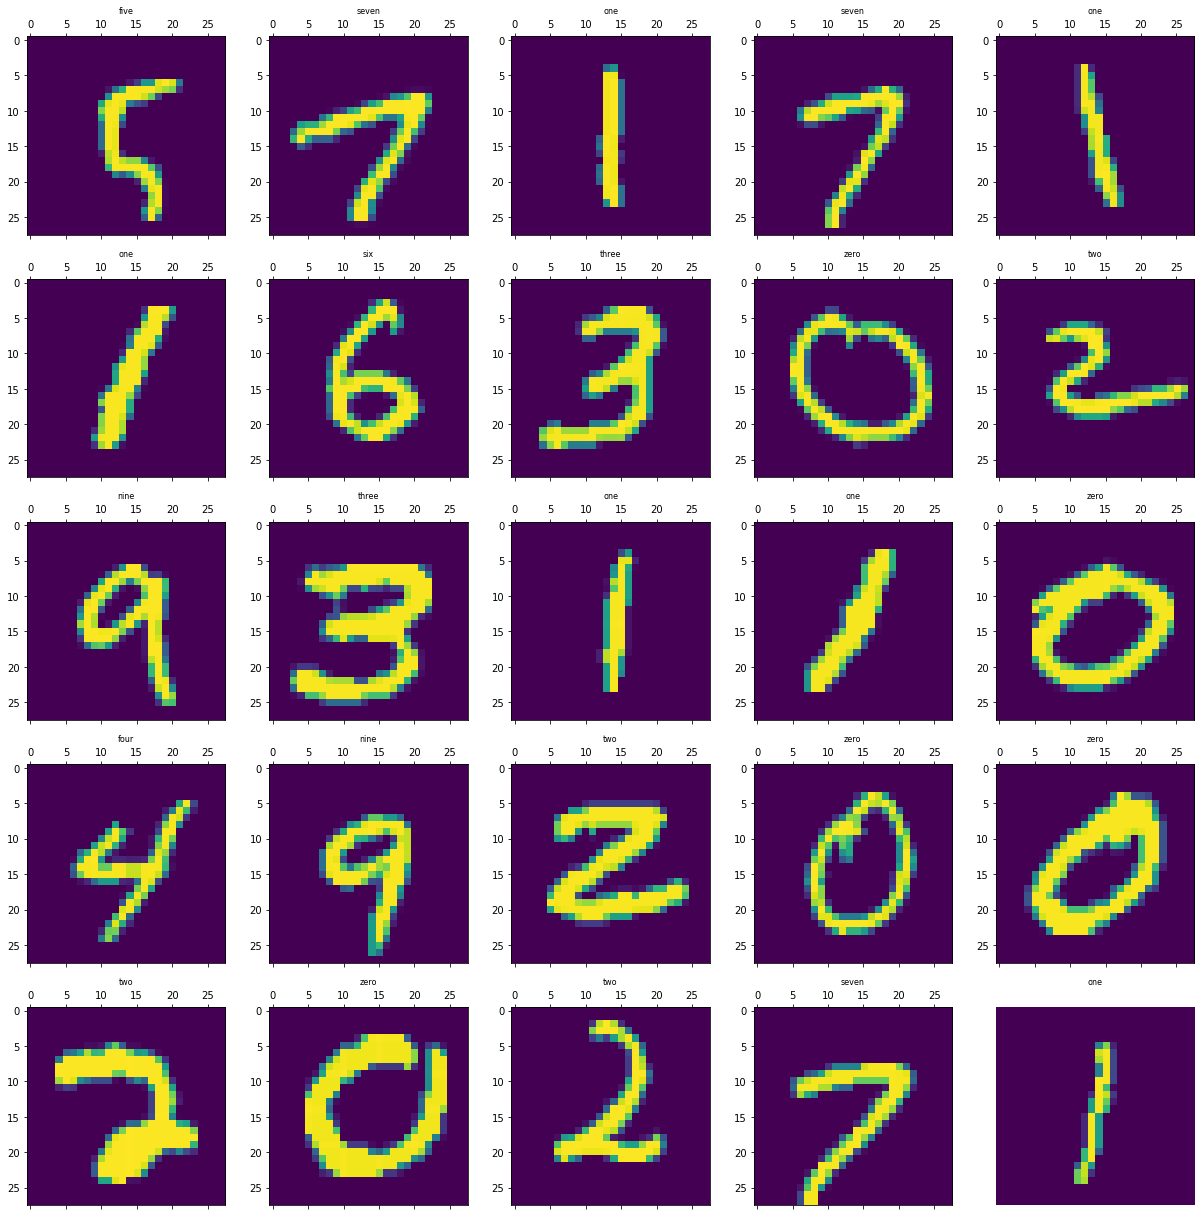

In [9]:
disp_img(X_train,y_train)

In [10]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [11]:
y_train.shape

(60000, 10)

In [27]:
def plot_acc(model_run,eps):
    plt.figure(figsize=(15,8))
    epochs = range(1,eps+1)
    train_accuracy = model_run.history['accuracy']
    val_accuracy = model_run.history['val_accuracy']
    sns.lineplot(epochs, train_accuracy, label ='Train',linewidth=1.5)
    sns.lineplot(epochs, val_accuracy, label ='validation',linewidth=1.5)
    plt.title('Accuracy v/s Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy') 
    
def plot_loss(model_run,eps):
    plt.figure(figsize=(15,8))
    epochs = range(1,eps+1)
    train_loss = model_run.history['loss']
    val_loss = model_run.history['val_loss']
    sns.lineplot(epochs, train_loss, label ='Train',linewidth=1.5)
    sns.lineplot(epochs, val_loss, label ='validation',linewidth=1.5)
    plt.title('Loss v/s Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')

def evaluation(model):
    loss,accuracy = model.evaluate(X_test,y_test)
    print('loss = ',np.round(loss,5))
    print('accuracy = ',np.round(accuracy*100,2))
    
    y_pred = np.argmax(model.predict(X_test),axis=1)
    print(classification_report(y_test2,y_pred))

def predict_image(model,index):
    y_pred = np.argmax(model.predict(X_test),axis=1)
    
    plt.matshow(X_test[index])
    y_ind = int(y_test2[index])
    labels = ['zero', 'one', 'two', 'three', 'four', 
          'five', 'six', 'seven', 'eight', 'nine']
    plt.title(labels[y_ind])
    
    y_ind2 = int(y_pred[index])
    print('predicted item name ::: ',labels[y_ind2])

# LeNet

In [13]:
img = X_train[0]

In [14]:
img.shape

(28, 28)

In [15]:
X_train = tf.expand_dims(X_train,3)
X_test = tf.expand_dims(X_test,3)

In [16]:
X_train.shape

TensorShape([60000, 28, 28, 1])

In [17]:
X_train = tf.cast(X_train,tf.float32)
X_test = tf.cast(X_test,tf.float32)

In [18]:
X_train = X_train/255.0
X_test = X_test/255.0

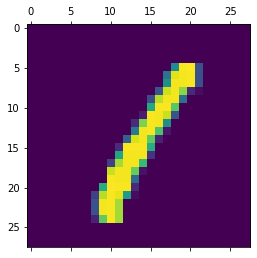

In [19]:
plt.matshow(X_train[3])

In [20]:
#rescale_image = tf.keras.Sequential([
#    tf.keras.layers.experimental.preprocessing.Rescaling(1./255)])

In [21]:
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [24]:
def lenet():
    
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(filters=6,kernel_size=5,activation='sigmoid',padding='same',input_shape=(28,28,1)),
        tf.keras.layers.AvgPool2D(pool_size=2,strides=2),
        tf.keras.layers.Conv2D(filters=16,kernel_size=5,activation='sigmoid'),
        tf.keras.layers.AvgPool2D(pool_size=2,strides=2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(120,activation='sigmoid'),
        tf.keras.layers.Dense(84,activation='sigmoid'),
        tf.keras.layers.Dense(10,activation='softmax')])
    
    optimizer = tf.keras.optimizers.SGD(learning_rate=0.9)
    model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])
    
    return model

In [28]:
eps = 30

In [29]:
model_lenet = lenet()
history_lenet = model_lenet.fit(X_train,y_train,epochs=eps,validation_split=0.2,validation_data=(X_test,y_test),callbacks=[tensorboard_callback])

Epoch 1/30
1500/1500 [==============================] - 21s 14ms/step - loss: 2.3112 - accuracy: 0.1050 - val_loss: 2.3138 - val_accuracy: 0.0956
Epoch 2/30
1500/1500 [==============================] - 21s 14ms/step - loss: 2.3078 - accuracy: 0.1053 - val_loss: 2.3091 - val_accuracy: 0.0975
Epoch 3/30
1500/1500 [==============================] - 19s 13ms/step - loss: 2.3074 - accuracy: 0.1044 - val_loss: 2.3176 - val_accuracy: 0.1060
Epoch 4/30
1500/1500 [==============================] - 20s 13ms/step - loss: 2.3079 - accuracy: 0.1051 - val_loss: 2.3062 - val_accuracy: 0.0997
Epoch 5/30
1500/1500 [==============================] - 24s 16ms/step - loss: 2.3076 - accuracy: 0.1051 - val_loss: 2.3117 - val_accuracy: 0.1060
Epoch 6/30
1500/1500 [==============================] - 21s 14ms/step - loss: 2.3076 - accuracy: 0.1061 - val_loss: 2.3139 - val_accuracy: 0.0989
Epoch 7/30
1500/1500 [==============================] - 21s 14ms/step - loss: 2.3077 - accuracy: 0.1050 - val_loss: 2.3055 -

In [30]:
model_lenet.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d_6 (Averag  (None, 14, 14, 6)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_7 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_7 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten_3 (Flatten)         (None, 400)               0         
                                                                 
 dense_9 (Dense)             (None, 120)              

C:\Users\91700\Desktop\sambitml\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\91700\Desktop\sambitml\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


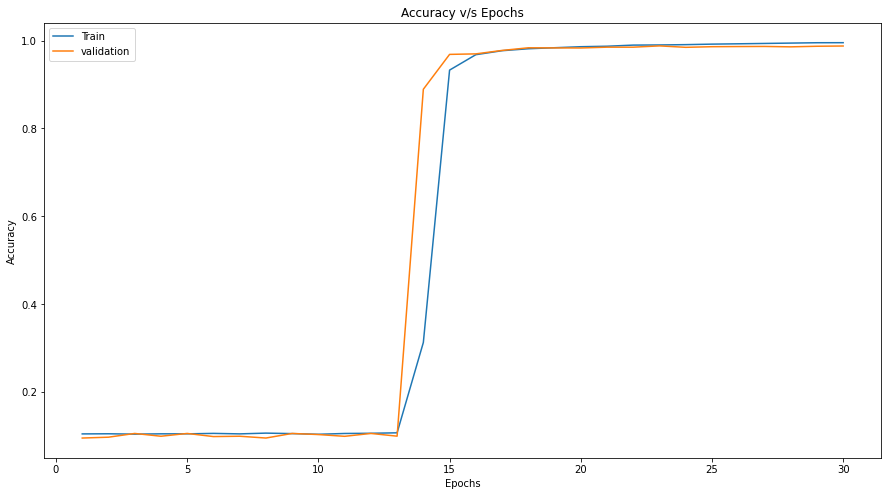

In [31]:
plot_acc(history_lenet,eps)

C:\Users\91700\Desktop\sambitml\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\91700\Desktop\sambitml\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


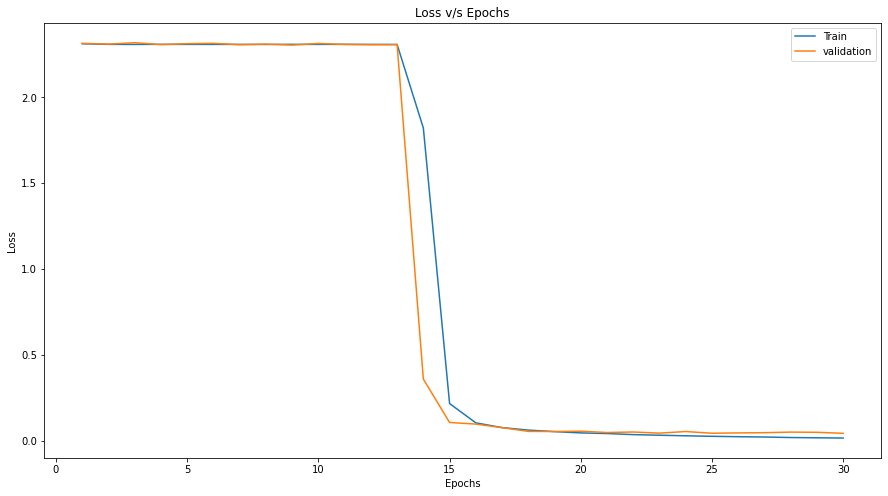

In [32]:
plot_loss(history_lenet,eps)

In [33]:
evaluation(model_lenet)

313/313 [==============================] - 2s 6ms/step - loss: 0.0366 - accuracy: 0.9891
loss =  0.03658
accuracy =  98.91
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       1.00      0.99      1.00      1135
           2       0.99      1.00      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.98      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.98      0.99       958
           7       0.98      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



predicted item name :::  two


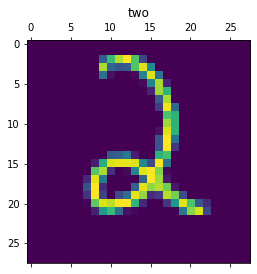

In [34]:
predict_image(model_lenet,47)

In [36]:
%load_ext tensorboard

In [37]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 15956), started 0:34:30 ago. (Use '!kill 15956' to kill it.)